In [1]:
#Imports

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape[0]

348978

In [6]:
print ((train.target == 0).sum()/train.shape[0], (train.target==1).sum()/train.shape[0])

0.892921616835 0.107078383165


In [7]:
for col in train.columns:
    if(train[col].isnull().any()):
        print (col)

cat_var_1
cat_var_3
cat_var_8


In [8]:
cat1 = train.cat_var_1.value_counts()
print ((train.cat_var_1.isnull().sum())/train.shape[0])
print ((train.cat_var_3.isnull().sum())/train.shape[0])
print ((train.cat_var_8.isnull().sum())/train.shape[0])

0.0452234811363
0.125661216466
0.314455352486


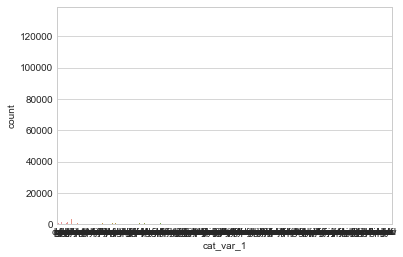

In [9]:
ax = sns.countplot(x="cat_var_1",data=train,)

In [10]:
cat2 = train.cat_var_3.value_counts()

In [11]:
train.describe()

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_19,cat_var_20,cat_var_21,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
count,3.489780e+05,348978.000000,348978.000000,3.489780e+05,3.489780e+05,3.489780e+05,3.489780e+05,348978.000000,348978.000000,348978.000000,...,348978.000000,348978.0,348978.0,348978.0,348978.0,348978.000000,348978.0,348978.000000,348978.0,348978.000000
mean,2.059731e-05,0.160586,0.000011,4.604324e-05,8.187931e-06,1.482768e-05,1.942554e-05,0.520279,0.479721,0.672257,...,0.000003,0.0,0.0,0.0,0.0,0.000009,0.0,0.000003,0.0,0.107078
std,1.930948e-03,0.131499,0.002538,1.999947e-03,7.213736e-04,1.492990e-03,1.462171e-03,0.499589,0.499589,0.469391,...,0.001693,0.0,0.0,0.0,0.0,0.002932,0.0,0.001693,0.0,0.309213
min,0.000000e+00,0.000317,0.000000,4.000000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,4.605263e-08,0.084514,0.000000,3.550000e-07,4.671053e-08,4.407895e-08,1.720602e-08,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
50%,1.802632e-07,0.101512,0.000000,1.875000e-06,2.598684e-07,9.868421e-08,8.252516e-08,1.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
75%,6.513158e-07,0.160833,0.000000,2.105000e-06,2.769737e-07,4.618421e-07,3.571842e-07,1.000000,1.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
max,5.427632e-01,1.000000,0.758621,3.750000e-01,2.171053e-01,4.605263e-01,3.542030e-01,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000


In [12]:
#finding columns with categorical data
cols = train.columns
num_cols = train._get_numeric_data().columns
categorical_col = list(set(cols)-set(num_cols))
categorical_col.remove('transaction_id')
print (categorical_col)

['cat_var_5', 'cat_var_13', 'cat_var_4', 'cat_var_16', 'cat_var_6', 'cat_var_7', 'cat_var_18', 'cat_var_3', 'cat_var_2', 'cat_var_8', 'cat_var_9', 'cat_var_15', 'cat_var_14', 'cat_var_10', 'cat_var_1', 'cat_var_11', 'cat_var_12', 'cat_var_17']


In [13]:
#finding columns with categorical data
cols = test.columns
num_cols = test._get_numeric_data().columns
categorical_col = list(set(cols)-set(num_cols))
categorical_col.remove('transaction_id')
print (categorical_col)

['cat_var_5', 'cat_var_13', 'cat_var_4', 'cat_var_16', 'cat_var_6', 'cat_var_7', 'cat_var_18', 'cat_var_3', 'cat_var_2', 'cat_var_8', 'cat_var_9', 'cat_var_15', 'cat_var_14', 'cat_var_10', 'cat_var_1', 'cat_var_11', 'cat_var_12', 'cat_var_17']


In [14]:
lb = LabelEncoder()
for col in categorical_col:
    train[col] = lb.fit_transform(train[col].astype('str'))
    test[col] = lb.fit_transform(test[col].astype('str'))

In [15]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,268,3,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,65,48,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,127,3,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,268,3,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,65,48,...,0,0,0,0,0,0,0,0,0,0


In [16]:
for col1 in categorical_col:
    for col2 in categorical_col:
        print(col1,col2)
        print(train[col1].corr(train[col2]))

cat_var_5 cat_var_5
1.0
cat_var_5 cat_var_13
-0.0898684893964
cat_var_5 cat_var_4
-0.0402688575881
cat_var_5 cat_var_16
-0.230789808971
cat_var_5 cat_var_6
0.430249813694
cat_var_5 cat_var_7
-0.0116917596949
cat_var_5 cat_var_18
-0.440833590083
cat_var_5 cat_var_3
-0.0163912082213
cat_var_5 cat_var_2
-0.525496448199
cat_var_5 cat_var_8
-0.43362515654
cat_var_5 cat_var_9
0.0731873718283
cat_var_5 cat_var_15
-0.540724431723
cat_var_5 cat_var_14
-0.145286923865
cat_var_5 cat_var_10
0.092944104169
cat_var_5 cat_var_1
0.145315924242
cat_var_5 cat_var_11
0.0178649125365
cat_var_5 cat_var_12
0.0339675570063
cat_var_5 cat_var_17
0.478908751661
cat_var_13 cat_var_5
-0.0898684893964
cat_var_13 cat_var_13
1.0
cat_var_13 cat_var_4
-0.369478970705
cat_var_13 cat_var_16
0.109180178349
cat_var_13 cat_var_6
-0.0130944970504
cat_var_13 cat_var_7
0.0408260494843
cat_var_13 cat_var_18
-0.153850443331
cat_var_13 cat_var_3
0.0208845173181
cat_var_13 cat_var_2
-0.160844933993
cat_var_13 cat_var_8
0.20095554

0.236357899142
cat_var_10 cat_var_7
-0.00270036611519
cat_var_10 cat_var_18
-0.150516880957
cat_var_10 cat_var_3
-0.0031670549406
cat_var_10 cat_var_2
-0.137643077664
cat_var_10 cat_var_8
-0.210572028392
cat_var_10 cat_var_9
-0.0114402156053
cat_var_10 cat_var_15
-0.141815770321
cat_var_10 cat_var_14
-0.115956347254
cat_var_10 cat_var_10
1.0
cat_var_10 cat_var_1
-0.0761837070497
cat_var_10 cat_var_11
-0.0933251329571
cat_var_10 cat_var_12
0.189716399412
cat_var_10 cat_var_17
0.103187395312
cat_var_1 cat_var_5
0.145315924242
cat_var_1 cat_var_13
0.324959113242
cat_var_1 cat_var_4
-0.769712381953
cat_var_1 cat_var_16
-0.303858990258
cat_var_1 cat_var_6
-0.00121925731266
cat_var_1 cat_var_7
0.0235294917091
cat_var_1 cat_var_18
-0.196953743044
cat_var_1 cat_var_3
-0.0166910134148
cat_var_1 cat_var_2
-0.457499427268
cat_var_1 cat_var_8
0.328717153448
cat_var_1 cat_var_9
0.0228024544819
cat_var_1 cat_var_15
-0.384102280964
cat_var_1 cat_var_14
0.558480883786
cat_var_1 cat_var_10
-0.076183707

In [17]:
cols = train.columns
cols = list(cols)
cols.remove('transaction_id')
cols.remove('target')
print (cols)

['num_var_1', 'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7', 'cat_var_1', 'cat_var_2', 'cat_var_3', 'cat_var_4', 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_8', 'cat_var_9', 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13', 'cat_var_14', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18', 'cat_var_19', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_23', 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_31', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_39', 'cat_var_40', 'cat_var_41', 'cat_var_42']


In [18]:
new_col = []
for col in cols:
    if(len(train[col].unique())>1):
        new_col.append(col)
cols = new_col
print(cols)


['num_var_1', 'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7', 'cat_var_1', 'cat_var_2', 'cat_var_3', 'cat_var_4', 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_8', 'cat_var_9', 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13', 'cat_var_14', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18', 'cat_var_19', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_23', 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_39', 'cat_var_41']


In [19]:
print (train.cat_var_31.unique())

[0]


In [20]:
def normalize(df):
    df_norm = (df - df.mean())/(df.max()-df.min())
    return df_norm

In [21]:
train_norm = normalize(train[cols])

In [22]:
test_norm  = normalize(test[cols])

In [23]:
train_norm['target'] = train['target']

In [24]:
train_norm

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,...,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_32,cat_var_33,cat_var_34,cat_var_39,cat_var_41,target
0,-3.790656e-05,-0.120443,-0.000014,-0.000122,-0.000038,-0.000032,-0.000055,0.192918,-0.237284,-0.385778,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
1,-2.327262e-05,-0.002715,-0.000014,-0.000117,-0.000036,-0.000015,-0.000048,-0.187231,0.525428,0.474612,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
2,-3.780474e-05,-0.071469,-0.000014,-0.000122,-0.000037,-0.000032,-0.000054,-0.071127,-0.237284,-0.252661,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
3,-3.780353e-05,0.066674,-0.000014,-0.000120,-0.000037,-0.000032,-0.000055,0.192918,-0.237284,-0.281882,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
4,-3.183019e-05,-0.000176,-0.000014,-0.000117,-0.000036,-0.000025,-0.000049,-0.187231,0.525428,0.477858,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
5,-3.758898e-05,-0.082046,-0.000014,-0.000122,-0.000037,-0.000032,-0.000055,-0.071127,-0.237284,0.140196,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
6,-3.762898e-05,0.440061,-0.000014,-0.000111,-0.000035,-0.000032,-0.000055,-0.020565,-0.237284,0.140196,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
7,-3.784232e-05,-0.008215,-0.000014,-0.000117,-0.000036,-0.000032,-0.000055,-0.187231,0.525428,0.406430,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
8,-3.788838e-05,-0.067555,-0.000014,-0.000121,-0.000037,-0.000032,-0.000055,0.295915,-0.237284,-0.002661,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0
9,-3.693565e-05,-0.002186,-0.000014,-0.000117,-0.000036,-0.000031,-0.000054,-0.187231,0.525428,0.245715,...,-0.000003,-0.000026,-0.000054,-0.000117,-0.000006,-0.000006,-0.000003,-0.000009,-0.000003,0


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train[cols])

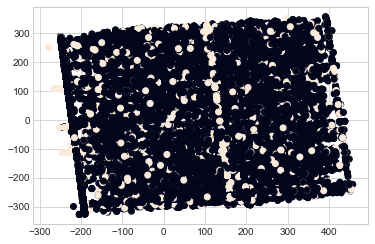

In [26]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=train['target'].values)

In [27]:
#explained_variance = []
#for component in range(2,40):
 #   pca = PCA(n_components=component)
  #  pca.fit_transform(train[cols])
   # explained_variance.append(pca.explained_variance_ratio_.sum())
#plt.plot(explained_variance)

In [28]:
#explained_variance

In [29]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(train[cols])

In [30]:
pca_test = PCA(n_components=3)
X_pca_test = pca.fit_transform(test[cols])

In [31]:
X_pca

array([[  77.41040482,  249.10210246,   90.34451518],
       [ 202.58450392, -277.81771361, -107.28454261],
       [-234.51172138,  133.11513755,  -26.95881523],
       ..., 
       [ 177.11199777,  -11.16792222, -115.78996074],
       [-219.84277521,  -20.10572526,  -22.06374892],
       [ 200.74464398, -258.916874  , -107.89798817]])

In [32]:
Y_pca = train['target'].values

In [33]:
df = pd.DataFrame()
df['c1'] = X_pca[:,0]
df['c2'] = X_pca[:,1]
df['c3'] = X_pca[:,2]
df['target'] = Y_pca

In [34]:
df.head()

,c1,c2,c3,target
0,77.410405,249.102102,90.344515,0
1,202.584504,-277.817714,-107.284543,0
2,-234.511721,133.115138,-26.958815,0
3,56.971019,185.025946,146.023465,0
4,202.734253,-279.811859,-107.232229,0


In [35]:
itrain,itest = train_test_split(range(X_pca.shape[0]),train_size=0.7)
mask = np.ones(X_pca.shape[0],dtype='int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask==1)

In [36]:
print(np.mean(train[mask].target))
print(np.mean(train[~mask].target))

0.10678145109790244
0.10777121898103043


In [37]:
def cv_optimize(clf,parameters,X,y,n_jobs = 1,n_folds = 10,score_func = None):
    if(score_func):
        gs = GridSearchCV(clf,param_grid=parameters,cv=n_folds,n_jobs=n_jobs,scoring=score_func)
    else:
        gs = GridSearchCV(clf,param_grid=parameters,cv=n_folds,n_jobs=n_jobs)
    gs.fit(X,y)
    print("Best ",gs.best_params_,gs.best_score_,gs.grid_scores_)
    best = gs.best_estimator_
    return best,gs.grid_scores_

    

def do_classify(clf,parameters,indf,features,targetname,target1val,mask=None,n_folds=10,score_func = None,n_jobs = 1):
    subdf = indf[features]
    X = subdf.values
    y = (indf[targetname].values == target1val)*1
    if(mask[0]!=None):
        print("using Mask")
        Xtrain,Ytrain,Xtest,Ytest = X[mask],y[mask],X[~mask],y[~mask]
    else:
        print("mask not present")
    grid_scores = None
    if(parameters):
        clf,grid_scores = cv_optimize(clf,parameters,Xtrain,Ytrain,n_jobs,n_folds,score_func=score_func)
    clf_train_fit = clf.fit(Xtrain,Ytrain)
    training_acccuracy = clf_train_fit.score(Xtrain,Ytrain)
    test_accuracy = clf_train_fit.score(Xtest,Ytest)
    clf_total_fit = clf.fit(X,y)
    print ("Train accuracy ",training_acccuracy)
    print ("Test accuracy",test_accuracy)
    print (confusion_matrix(Ytest,clf_train_fit.predict(Xtest)))
    return clf_total_fit,grid_scores

In [38]:
lr = LogisticRegression(class_weight="balanced")
parameters = {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
clf,grid_scores = do_classify(lr,parameters,df,['c1','c2','c3'],'target',1,mask,n_folds=10)

using Mask
Best  {'C': 0.1} 0.7009218778143472 [mean: 0.70084, std: 0.00394, params: {'C': 0.001}, mean: 0.70090, std: 0.00395, params: {'C': 0.01}, mean: 0.70092, std: 0.00395, params: {'C': 0.1}, mean: 0.70092, std: 0.00395, params: {'C': 1}, mean: 0.70092, std: 0.00395, params: {'C': 10}, mean: 0.70092, std: 0.00395, params: {'C': 100}, mean: 0.70092, std: 0.00395, params: {'C': 1000}, mean: 0.70092, std: 0.00395, params: {'C': 10000}]
Train accuracy  0.700901409834
Test accuracy 0.69874109309
[[68763 24648]
 [ 6844  4439]]


In [39]:
LogisticRegression?

In [40]:
result = clf.predict_proba(X_pca_test)[:,1]

In [41]:
df_ping = pd.DataFrame()
df_ping['transaction_id'] = test['transaction_id'].values
df_ping['target'] = result

In [42]:
df_ping.set_index('transaction_id',inplace=True)

In [43]:
df_ping.to_csv("Hamse_na_ho_payega.csv")

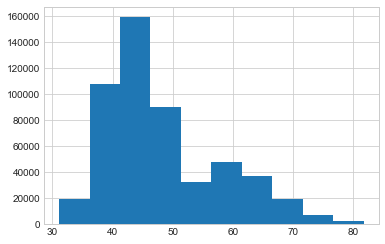

In [44]:
plt.hist(clf.predict_proba(X_pca_test)[:,1]*100);

In [45]:
# takes long long long time. Abadoned for large data set
#from sklearn.svm import SVC
#clfsvm = SVC(kernel="rbf",class_weight="balanced")
#parameters = {"C":[0.001, 0.01, 0.1,1.0]}
#clfsvm = do_classify(clfsvm,parameters,df,['c1','c2','c3'],'target',1,mask,n_folds=10,n_jobs = 10)

In [46]:
#Stepping into unknown territory again
#Gradient Boosting

In [47]:
correlations = []
between = []
for col1 in cols:
    for col2 in cols:
        if(col1 != col2):
            correlations.append(train[col1].corr(train[col2]))
            between.append(zip(col1,col2))

In [48]:
new_cor = correlations

In [49]:
new_cor.sort()

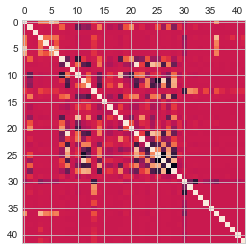

In [50]:
plt.matshow(train[cols].corr())

In [51]:
corr_data = train[cols].corr()

In [52]:
for col in cols:
    print("col---",col)
    cd =  (corr_data[col])
    for col2 in cols:
        if(cd[col2]>0.8 and col2!=col):
            print (col2,cd[col2])
    print ("--------")

col--- num_var_1
num_var_6 0.807995755487
--------
col--- num_var_2
--------
col--- num_var_3
--------
col--- num_var_4
--------
col--- num_var_5
--------
col--- num_var_6
num_var_1 0.807995755487
--------
col--- num_var_7
--------
col--- cat_var_1
--------
col--- cat_var_2
cat_var_15 0.967482087831
--------
col--- cat_var_3
--------
col--- cat_var_4
--------
col--- cat_var_5
cat_var_20 0.880654082293
--------
col--- cat_var_6
--------
col--- cat_var_7
--------
col--- cat_var_8
--------
col--- cat_var_9
--------
col--- cat_var_10
--------
col--- cat_var_11
--------
col--- cat_var_12
--------
col--- cat_var_13
--------
col--- cat_var_14
--------
col--- cat_var_15
cat_var_2 0.967482087831
--------
col--- cat_var_16
--------
col--- cat_var_17
--------
col--- cat_var_18
--------
col--- cat_var_19
--------
col--- cat_var_20
cat_var_5 0.880654082293
--------
col--- cat_var_21
--------
col--- cat_var_22
--------
col--- cat_var_23
--------
col--- cat_var_24
--------
col--- cat_var_25
--------


In [53]:
cols.remove('cat_var_2')

In [54]:
cols.remove('cat_var_5')

In [55]:
gbm = GradientBoostingClassifier(random_state=10)
features = cols
parameters = None
#clf = do_classify(gbm,features=cols,indf=train,parameters=None,mask=mask,n_folds=10,n_jobs=1,target1val=1,targetname='target',score_func=None)
#result = clf.predict_proba(test)

In [56]:
GradientBoostingClassifier?

In [57]:
test = test[cols]

In [58]:
for col in test_norm.columns:
    if(test_norm[col].isnull().any()):
        print (col)

cat_var_41


In [59]:
test['cat_var_41'].value_counts()

0    523466
Name: cat_var_41, dtype: int64

In [60]:
train['cat_var_41'].value_counts()

0    348977
1         1
Name: cat_var_41, dtype: int64

In [61]:
for col in cols:
    print (train[col].value_counts())

1.315789e-08    4208
6.578947e-09    3804
6.578947e-08    3417
2.631579e-08    3047
1.644737e-08    3037
3.256579e-07    2902
1.973684e-08    2661
3.289474e-08    2594
4.605263e-09    2333
5.921053e-09    2317
1.250000e-08    2270
3.947368e-09    2104
2.171053e-08    1983
8.421053e-08    1973
3.947368e-08    1857
2.302632e-08    1829
3.289474e-09    1808
1.315789e-07    1776
9.868421e-09    1688
9.868421e-08    1674
1.302632e-07    1672
2.500000e-08    1573
2.631579e-09    1569
3.289474e-07    1540
7.894737e-09    1530
4.605263e-08    1504
1.578947e-08    1434
9.210526e-09    1431
7.236842e-09    1394
5.263158e-09    1389
                ... 
4.500000e-06       1
1.123224e-05       1
2.819434e-04       1
1.097961e-05       1
5.194079e-06       1
5.772368e-06       1
3.327632e-06       1
1.224408e-05       1
6.628289e-06       1
1.050461e-05       1
5.201974e-06       1
2.413816e-06       1
2.046579e-05       1
4.419737e-06       1
7.522895e-05       1
1.086250e-05       1
7.413158e-06 

Name: cat_var_7, dtype: int64
57     132170
227    109738
164     20217
344      6921
426      6303
351      3471
82       3236
203      3015
158      2472
247      2207
34       2089
198      2040
296      1863
286      1641
339      1534
99       1345
260      1238
438      1183
387      1168
192      1092
275       959
378       947
9         859
165       842
348       809
141       756
128       726
355       720
223       717
413       616
        ...  
381         7
106         7
59          7
242         7
343         7
117         7
430         7
440         7
323         6
442         6
295         6
371         5
281         5
352         5
21          5
16          4
397         4
122         4
342         4
284         4
205         4
248         3
314         3
319         3
331         3
330         3
202         3
297         3
144         2
398         1
Name: cat_var_8, Length: 463, dtype: int64
1    81529
4    73011
3    69983
2    67386
0    57069
Name: cat_var_9, d

In [62]:
#that was the base result. Checking for what more can we do
#clf.feature_importances_

In [63]:
#feat_imp = pd.Series(clf.feature_importances_, cols).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances')
#plt.ylabel('Feature Importance Score')

In [64]:
test[test['cat_var_41']==1]

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_3,cat_var_4,...,cat_var_26,cat_var_27,cat_var_28,cat_var_29,cat_var_30,cat_var_32,cat_var_33,cat_var_34,cat_var_39,cat_var_41


In [65]:
train.shape[0]

348978

In [66]:
min_sample_split = 500
min_sample_leaf = 50
max_depth = 10
max_features = 'sqrt'
subsample = 0.8
estimate = [i for i in range(20,81,10)]

In [67]:
'''
parameters = {'n_estimators': estimate}
gbm_new = GradientBoostingClassifier(learning_rate=0.1,max_depth=max_depth,min_samples_split=min_sample_split,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)
clf_new = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=4,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')
result = clf_new.predict_proba(test)
'''


"\nparameters = {'n_estimators': estimate}\ngbm_new = GradientBoostingClassifier(learning_rate=0.1,max_depth=max_depth,min_samples_split=min_sample_split,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)\nclf_new = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=4,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')\nresult = clf_new.predict_proba(test)\n"

In [68]:
n_estimator = 60


In [69]:
range?

In [70]:
max_depth = [i for i in range(5,16,2)]
min_sample_split = [i for i in range(200,1001,200)]

In [71]:
'''
parameters = {'max_depth':max_depth,'min_samples_split': min_sample_split}
gbm_new = GradientBoostingClassifier(n_estimators=60,le arning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)
clf_new = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')

'''


"\nparameters = {'max_depth':max_depth,'min_samples_split': min_sample_split}\ngbm_new = GradientBoostingClassifier(n_estimators=60,le arning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)\nclf_new = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')\n\n"

In [72]:
max_depth = 10
min_sample_split = [25,35,50,75,100,150]

In [73]:
'''
parameters = {'min_samples_split': min_sample_split}
gbm_new = GradientBoostingClassifier(max_depth=10,n_estimators=60,learning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)
clf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')

'''

"\nparameters = {'min_samples_split': min_sample_split}\ngbm_new = GradientBoostingClassifier(max_depth=10,n_estimators=60,learning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)\nclf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')\n\n"

In [74]:
'''
parameters = {'max_depth': [15,18,20]}
gbm_new = GradientBoostingClassifier(min_samples_split=200,n_estimators=60,learning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)
clf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')

'''


"\nparameters = {'max_depth': [15,18,20]}\ngbm_new = GradientBoostingClassifier(min_samples_split=200,n_estimators=60,learning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)\nclf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')\n\n"

In [75]:
grid_scores

[mean: 0.70084, std: 0.00394, params: {'C': 0.001},
 mean: 0.70090, std: 0.00395, params: {'C': 0.01},
 mean: 0.70092, std: 0.00395, params: {'C': 0.1},
 mean: 0.70092, std: 0.00395, params: {'C': 1},
 mean: 0.70092, std: 0.00395, params: {'C': 10},
 mean: 0.70092, std: 0.00395, params: {'C': 100},
 mean: 0.70092, std: 0.00395, params: {'C': 1000},
 mean: 0.70092, std: 0.00395, params: {'C': 10000}]

In [76]:
subsample

0.8

In [77]:
min_sample_leaf = [i for i in range(30,71,15)]
max_features = 'sqrt'

In [78]:
'''
parameters = {'min_samples_leaf': min_sample_leaf}
gbm_new = GradientBoostingClassifier(max_depth=15,min_samples_split=200,n_estimators=60,learning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)
clf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')

'''


"\nparameters = {'min_samples_leaf': min_sample_leaf}\ngbm_new = GradientBoostingClassifier(max_depth=15,min_samples_split=200,n_estimators=60,learning_rate=0.1,min_samples_leaf=min_sample_leaf,max_features=max_features,subsample=subsample,random_state=10)\nclf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=parameters,score_func='roc_auc',target1val=1,targetname='target')\n\n"

In [79]:
  grid_scores

[mean: 0.70084, std: 0.00394, params: {'C': 0.001},
 mean: 0.70090, std: 0.00395, params: {'C': 0.01},
 mean: 0.70092, std: 0.00395, params: {'C': 0.1},
 mean: 0.70092, std: 0.00395, params: {'C': 1},
 mean: 0.70092, std: 0.00395, params: {'C': 10},
 mean: 0.70092, std: 0.00395, params: {'C': 100},
 mean: 0.70092, std: 0.00395, params: {'C': 1000},
 mean: 0.70092, std: 0.00395, params: {'C': 10000}]

In [80]:
parameters = {'subsample': [0.7,0.8,0.85,0.9]}
gbm_new = GradientBoostingClassifier(max_depth=15,min_samples_split=200,n_estimators=120,learning_rate=0.05,min_samples_leaf=45,max_features=max_features,subsample=0.8,random_state=10)
clf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=None,score_func='f1',target1val=1,targetname='target')
result = clf_new.predict_proba(test)

using Mask
Train accuracy  0.928881957066
Test accuracy 0.926586050777
[[93311   100]
 [ 7381  3902]]


In [81]:
 grid_scores

Text(0,0.5,'Feature Importance Score')

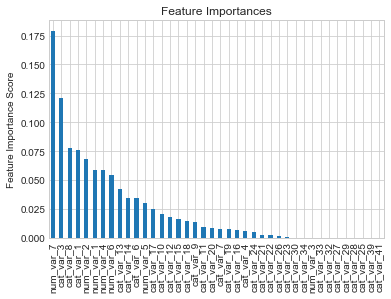

In [82]:
feat_imp = pd.Series(clf_new.feature_importances_, cols).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [83]:
feat_imp = pd.Series(clf.feature_importances_, cols).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
'''
gbm_new = GradientBoostingClassifier(max_depth=15,min_samples_split=200,n_estimators=180,learning_rate=0.03,min_samples_leaf=45,max_features=max_features,subsample=0.8,random_state=10)
clf_new,grid_scores = do_classify(gbm_new,features=cols,indf=train,mask=mask,n_folds=10,n_jobs=5,parameters=None,score_func='roc_auc',target1val=1,targetname='target')

'''
    

In [84]:
result1 = result[:,1]
test_again = pd.read_csv("test.csv")
hamse_na_ho_payega = pd.DataFrame()
hamse_na_ho_payega['transaction_id'] = test_again['transaction_id']
hamse_na_ho_payega['target'] = result1
hamse_na_ho_payega.set_index('transaction_id',inplace=True)
hamse_na_ho_payega.to_csv("hamse_na_ho_payega.csv")

In [87]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [88]:
xgb.train?